# Hantush-Jabob (1955) model
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pumping test in a confined aquifer with leakage.

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

The data set for this example has been provided by: 
Hall, P. Water well and aquifer test analysis 1996, Water Resources Publications, LLC, 412 pp. Example  Fig 11.14 p.267-268


First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management. 


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data

The diagnostic plot shows a behavior that indicates a possible constant head boundary effect.

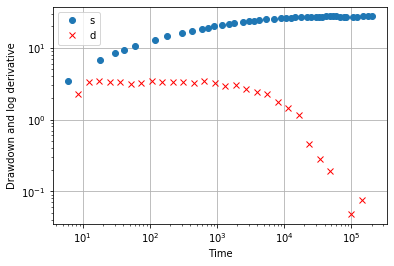

In [2]:
data = pd.read_csv('../data/htj_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data)
test.diagnostic()

## Model 

1) We initialize the Hantush & Jacob model with 6.309e-3 m^3/s, distance to the pumping well of 3.048 m and thickness of the aquitard 6.096 m and show first the typecurve.

2) Then a first model parameter guess is done and showing the results with the trial function.

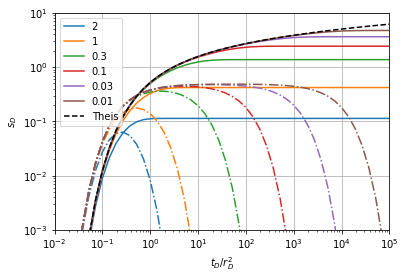

In [3]:
test= ht.HantushJacob()
test.plot_typecurve()

The model parameter guess is important to get reliable results, as in total 3 parameters needs to be fitted. That's the reason why the guess-param function includes the fit to the Theis model, to get the best estimate for the first 2 parameters.

`ftol` termination condition is satisfied.
Function evaluations 66, initial cost 5.3527e+02, final cost 7.3804e+01, first-order optimality 3.08e-06.
estimated parameter vector: [5.31798098e+00 3.00047275e-01 2.91404287e-07]


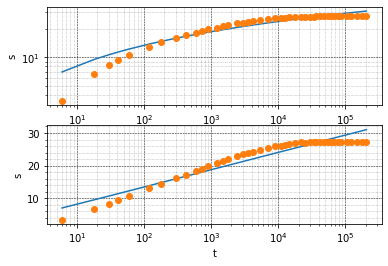

T =  0.00021737999407864836 m2/s
S =  1.5767325414909357e-05 -
Ri =  3363.821451687367 m


In [4]:
model = ht.HantushJacob(Q=6.309e-3, r=3.048, e=6.096, df=data, )
p = model.guess_params()
print("estimated parameter vector:",p)
model.inversion_option='dehoog'
model.trial()

Let use proceed with the automatic fit and directly report the results of the interpretation.

`xtol` termination condition is satisfied.
Function evaluations 32, initial cost 7.3804e+01, final cost 6.6139e-02, first-order optimality 2.11e-03.


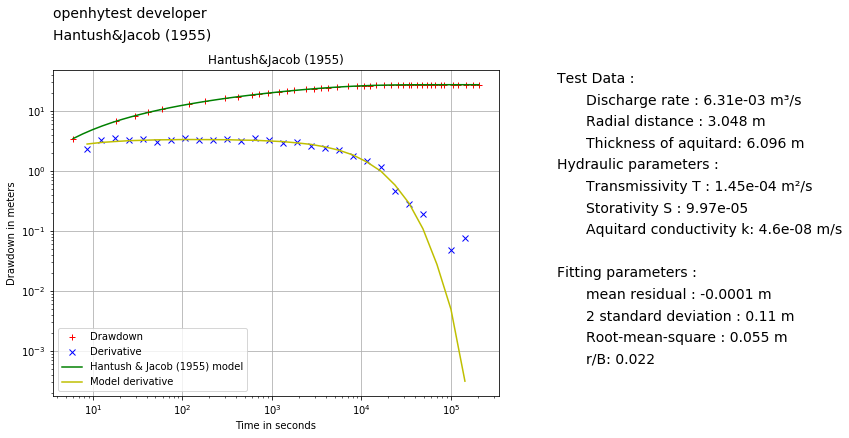

In [5]:
model.inversion_option='dehoog'
model.rpt(fitmethod='trf')

The results are in reasonable agreement with the values found by Hall (1996):

T = 7.77 e-5 m2/s

S = 5.0193 e-4